In [8]:
import pandas as pd
from pprint import pprint
import HydroCNHS
from HydroCNHS.LSM import runGWLF, calPEt_Hamon
WthData = pd.read_csv("GWLF_TaiwanShihmenReservoir_Data.csv")
P = WthData["P (cm)"].to_numpy() 
T = WthData["T (degC)"].to_numpy()

ModelPath = "GWLF_TaiwanShihmenReservoir_model.yaml"
model = HydroCNHS.loadModel(ModelPath)
pprint(model)

{'LSM': {'Model': 'GWLF',
         'Shihmen': {'Inputs': {'Area': 76340,
                                'Latitude': 24.811288,
                                'MonthlyTavg': [-5.43,
                                                -3.96,
                                                1.42,
                                                8.06,
                                                14.59,
                                                19.7,
                                                22.04,
                                                20.95,
                                                16.93,
                                                10.54,
                                                3.93,
                                                -2.47],
                                'S0': 3,
                                'SnowS': 0,
                                'U0': 6},
                     'Pars': {'Alpha': 0.57,
                              'Beta': 0.32,

In [9]:
Lat = model["LSM"]["Shihmen"]["Inputs"]["Latitude"]
StartDate = model["WaterSystem"]["StartDate"]
PE = calPEt_Hamon(T, Lat, StartDate)


In [10]:
GWLFPars = model["LSM"]["Shihmen"]["Pars"]
Inputs = model["LSM"]["Shihmen"]["Inputs"]
DataLength = model["WaterSystem"]["DataLength"]
Q = runGWLF(GWLFPars, Inputs, T, P, PE, StartDate, DataLength)


Correlation of daily result:  0.7480746671392405


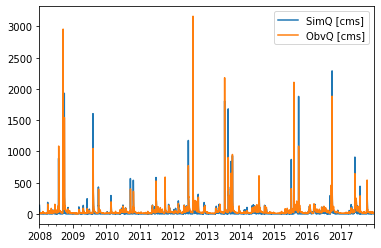

In [11]:
StartDate = pd.to_datetime(StartDate, format="%Y/%m/%d")                               # to Datetime
pdDatedateIndex = pd.date_range(start = StartDate, periods = DataLength, freq = "D")   # gen pd dateIndex

Result = pd.DataFrame()
Result["SimQ [cms]"] = Q
Result["ObvQ [cms]"] = WthData["ObvQ (cms)"].to_numpy()
Result.index = pdDatedateIndex

Result.plot()
print("Correlation of daily result: ", Result.corr().iloc[0,1])


Correlation of monthly result:  0.9728560682232408


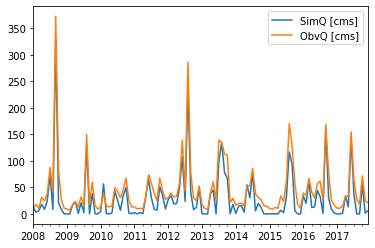

In [12]:
ResultM = Result.resample("M").mean()
ResultM.plot()
print("Correlation of monthly result: ", ResultM.corr().iloc[0,1])


Correlation of yearly result:  0.9700474826243645


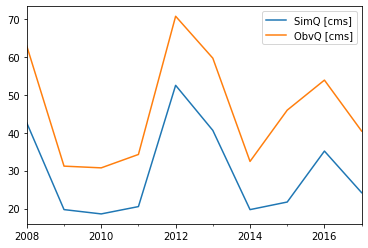

In [7]:
ResultY = Result.resample("Y").mean()
ResultY.plot()
print("Correlation of yearly result: ", ResultY.corr().iloc[0,1])